In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
!ls "/content/drive/My Drive/CoildOil"

ls: cannot access '/content/drive/My Drive/CoildOil': No such file or directory


In [0]:
import keras
import pandas as pd
import numpy as np
from keras import models
from keras import layers
from keras import optimizers
import matplotlib.pyplot as plt
from keras.datasets import imdb

In [0]:
(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 1s 0us/step


In [0]:
def vectorize_sequences(sequences,dimension=10000):
  results=np.zeros((len(sequences),dimension))
  for i, sequence in enumerate(sequences):
    results[i,sequence]=1.
  return results

x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)
y_train=np.asarray(train_labels).astype('float32')
y_test=np.asarray(test_labels).astype('float32')

model=models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [0]:
x_val=x_train[:10000]
partial_x_train=x_train[10000:]
y_val=y_train[:10000]
partial_y_train=y_train[10000:]

history=model.fit(partial_x_train,partial_y_train, validation_data=(x_val,y_val),epochs=20,batch_size=512)

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 187us/step - loss: 0.4955 - accuracy: 0.7988 - val_loss: 0.3786 - val_accuracy: 0.8679
Epoch 2/20
15000/15000 [==============================] - 1s 72us/step - loss: 0.2956 - accuracy: 0.9040 - val_loss: 0.3213 - val_accuracy: 0.8741
Epoch 3/20
15000/15000 [==============================] - 1s 71us/step - loss: 0.2205 - accuracy: 0.9297 - val_loss: 0.3084 - val_accuracy: 0.8764
Epoch 4/20
15000/15000 [==============================] - 1s 71us/step - loss: 0.1747 - accuracy: 0.9452 - val_loss: 0.2835 - val_accuracy: 0.8854
Epoch 5/20
15000/15000 [==============================] - 1s 71us/step - loss: 0.1442 - accuracy: 0.9536 - val_loss: 0.2816 - val_accuracy: 0.8877
Epoch 6/20
15000/15000 [==============================] - 1s 71us/step - loss: 0.1187 - accuracy: 0.9650 - val_loss: 0.2995 - val_accuracy: 0.8832
Epoch 7/20
15000/15000 [==============================] - 1s 71us/s

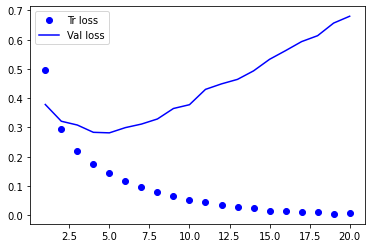

In [0]:
history_dict=history.history
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
epochs=range(1,len(loss_values)+1)

plt.plot(epochs,loss_values,'bo',label='Tr loss')
plt.plot(epochs,val_loss_values,'b',label='Val loss')
plt.legend()
plt.show()

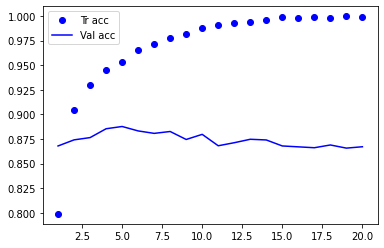

In [0]:
acc_values=history_dict['accuracy']
val_acc_values=history_dict['val_accuracy']
epochs=range(1,len(val_acc_values)+1)

plt.plot(epochs,acc_values,'bo',label='Tr acc')
plt.plot(epochs,val_acc_values,'b',label='Val acc')
plt.legend()
plt.show()

In [0]:
model=models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=4,batch_size=512)
results=model.evaluate(x_test,y_test)
print(results)


Epoch 1/4
25000/25000 [==============================] - 1s 48us/step - loss: 0.4507 - accuracy: 0.8138
Epoch 2/4
25000/25000 [==============================] - 1s 44us/step - loss: 0.2545 - accuracy: 0.9088
Epoch 3/4
25000/25000 [==============================] - 1s 44us/step - loss: 0.1941 - accuracy: 0.9307
Epoch 4/4
25000/25000 [==============================] - 2s 77us/step
[0.29650141273498537, 0.8840000033378601]
